# Librerias

In [ ]:
# Verificacion de la librerias necesarias
!pip list | grep cdsapi
!pip list | grep xarray
!pip list | grep pandas
!pip list | grep numpy
!pip list | grep matplotlib
!pip list | grep netcdf4

In [6]:
# Library
import cdsapi
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Dataset

In [ ]:
# Descarga de la data en formato netcdf

dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "10m_u_component_of_wind",
        "10m_v_component_of_wind",
        "2m_dewpoint_temperature",
        "2m_temperature",
        "skin_temperature",
        "instantaneous_10m_wind_gust",
        "mean_potential_evaporation_rate",
        "mean_surface_downward_short_wave_radiation_flux",
        "surface_latent_heat_flux",
        "surface_sensible_heat_flux",
        "surface_solar_radiation_downwards",
        "potential_evaporation",
        "snow_depth",
        "snowmelt",
        "volumetric_soil_water_layer_1",
        "volumetric_soil_water_layer_2",
        "volumetric_soil_water_layer_3",
        "volumetric_soil_water_layer_4",
        "vertically_integrated_moisture_divergence",
        "high_vegetation_cover",
        "leaf_area_index_high_vegetation",
        "leaf_area_index_low_vegetation",
        "low_vegetation_cover",
        "land_sea_mask",
        "slope_of_sub_gridscale_orography",
        "standard_deviation_of_orography",
        "total_column_water_vapour"
    ],
    "year": [
        "2017", "2018", "2019",
        "2020", "2021", "2022",
        "2023", "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [43.8, -9.3, 42.0, -6.7]    # [Norte, Oeste, Sur, Este]
}

# Crear cliente de la API y descargar el archivo
client = cdsapi.Client()
client.retrieve(dataset, request).download() #target='data_manuel.nc')

In [ ]:
# Datasets
dataset = xr.open_dataset('/home/kynz/Documents/cambio-climatico-hackaton/c33f73ea656b9f91d6f157e7d6b4eca5/data_stream-moda_stepType-avgad.nc')
dataset_2 = xr.open_dataset('/home/kynz/Documents/cambio-climatico-hackaton/c33f73ea656b9f91d6f157e7d6b4eca5/data_stream-moda_stepType-avgid.nc')
dataset_3 = xr.open_dataset('/home/kynz/Documents/cambio-climatico-hackaton/c33f73ea656b9f91d6f157e7d6b4eca5/data_stream-moda_stepType-avgua.nc')

#Notamos que los datos relevantes esta en el dataset_3
dataset_3

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 106, latitude: 13, longitude: 17)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 848B 2017-01-01 ... 2025-10-01
  * latitude    (latitude) float64 104B 44.0 43.75 43.5 ... 41.5 41.25 41.0
  * longitude   (longitude) float64 136B -10.0 -9.75 -9.5 ... -6.5 -6.25 -6.0
    expver      (valid_time) <U4 2kB ...
Data variables: (12/18)
    u10         (valid_time, latitude, longitude) float32 94kB ...
    v10         (valid_time, latitude, longitude) float32 94kB ...
    d2m         (valid_time, latitude, longitude) float32 94kB ...
    t2m         (valid_time, latitude, longitude) float32 94kB ...
    skt         (valid_time, latitude, longitude) float32 94kB ...
    sd          (valid_time, latitude, longitude) float32 94kB ...
    ...          ...
    lai_lv      (valid_time, latitude, longitude) float32 94kB ...
    cvl         (valid_time, latitude, longitude) float32 94kB ...
    lsm         (valid_time, latitude, longitude) float32 94kB ...
    slor        (valid_time, latitude, longitude) float32 94kB ...
    sdor        (valid_time, latitude, longitude) float32 94kB ...
    tcwv        (valid_time, latitude, longitude) float32 94kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-08T03:32 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
# Las variables relevantes la llevamos a un array:

da_t2m = dataset_3['t2m'].values.flatten()
da_d2m = dataset_3['d2m'].values.flatten()
da_u10 = dataset_3['u10'].values.flatten()
da_v10 = dataset_3['v10'].values.flatten()
da_skt = dataset_3['skt'].values.flatten()
da_sd = dataset_3['sd'].values.flatten()
da_swvl1 = dataset_3['swvl1'].values.flatten()
da_swvl2 = dataset_3['swvl2'].values.flatten()
da_swvl3 = dataset_3['swvl3'].values.flatten()
da_swvl4 = dataset_3['swvl4'].values.flatten()
da_lai_hv = dataset_3['lai_hv'].values.flatten()
da_lai_lv = dataset_3['lai_lv'].values.flatten()
da_cvl = dataset_3['cvl'].values.flatten()
da_lsm = dataset_3['lsm'].values.flatten()
da_slor = dataset_3['slor'].values.flatten()
da_sdor = dataset_3['sdor'].values.flatten()
da_tcwv = dataset_3['tcwv'].values.flatten()

### Variable incendio

Ahora bien, debido a que necesitamos un modelo que nos indique cuando es probable que suceda un incendio es necesario un valor que nos indique cuando ha habido un incendio en las fechas establecidas, y asi estudiar los valores metereologico de ese dia y en esa zona, para proponer un modelo matematico para predecir posibles incendio (es decir un indice de riesgo). En los datos de copernicus con los cuales estamos trabajando no se encuentra una variable asi, debido a eso se realizzo una investigacion y se obtiene un dataset que si indica los incendio a lo largo del tiempo, entonces haremos un cruce de datos

#### dataset fires-all.csv

In [ ]:
# Esta celda ya no se usa, se optimizo en la celda de abajo
# Esta como ejemplo de como se partio el analisis de datos del dataset fires-all.csv
# Cargar del CSV y procesamiento
fire = pd.read_csv("fires-all.csv")

# Fecha → datetime
fire["fecha"] = pd.to_datetime(fire["fecha"], errors="coerce")

# Filtrar registros válidos
fire = fire[
    fire["fecha"].notna() &
    fire["lat"].notna() &
    fire["lng"].notna()
]

# Solo años de interés
fire = fire[
    (fire["fecha"] >= "2017-01-01") &
    (fire["fecha"] <= "2025-12-31")
]

# Renombrar para que coincidan con dataset
fire = fire.rename(columns={"lat": "latitude", "lng": "longitude"})

# Redondear coordenadas para hacer match con el grid del dataset
fire["latitude"]  = fire["latitude"].round(2)
fire["longitude"] = fire["longitude"].round(2)

# Normalizar fecha (dataset es diario)
fire["fecha"] = fire["fecha"].dt.normalize()

# Convertir a set para lookup eficiente
fire_set = set(
    zip(fire["fecha"], fire["latitude"], fire["longitude"])
)

print(f"Eventos de incendio en CSV: {len(fire_set)}")

# Preparar coordenadas del dataset

times = pd.to_datetime(dataset_3.valid_time.values).normalize()
lats  = np.round(dataset_3.latitude.values, 2)
lons  = np.round(dataset_3.longitude.values, 2)

# Crear DataArray booleana
incendio = xr.DataArray(
    data=np.zeros((len(times), len(lats), len(lons)), dtype=bool),
    coords=dict(
        valid_time=times,
        latitude=lats,
        longitude=lons
    ),
    dims=("valid_time", "latitude", "longitude")
)

# Rellenar coincidencias (versión eficiente)

# Producto cartesiano de coordenadas del dataset
grid = (
    pd.MultiIndex.from_product(
        [times, lats, lons],
        names=["fecha", "latitude", "longitude"]
    )
    .to_frame(index=False)
)

# Crear columna True/False usando el set
grid["incendio"] = list(
    zip(grid["fecha"], grid["latitude"], grid["longitude"])
)
grid["incendio"] = grid["incendio"].isin(fire_set)

# Convertir a DataArray (reshape)
incendio.data[:] = grid["incendio"].values.reshape(len(times), len(lats), len(lons))

#Asignar al dataset original
dataset_3 = dataset_3.assign(incendio=incendio)

print(dataset_3)

# Guardar nuevo NC
dataset_3.to_netcdf("dataset_incendios.nc")
print("✅ Guardado como dataset_incendios.nc")



Eventos de incendio en CSV: 14337
<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 106, latitude: 13, longitude: 17)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 848B 2017-01-01 ... 2025-10-01
  * latitude    (latitude) float64 104B 44.0 43.75 43.5 ... 41.5 41.25 41.0
  * longitude   (longitude) float64 136B -10.0 -9.75 -9.5 ... -6.5 -6.25 -6.0
    expver      (valid_time) <U4 2kB ...
Data variables: (12/19)
    u10         (valid_time, latitude, longitude) float32 94kB -1.828 ... 0.4296
    v10         (valid_time, latitude, longitude) float32 94kB -0.8554 ... 0....
    d2m         (valid_time, latitude, longitude) float32 94kB 281.0 ... 280.9
    t2m         (valid_time, latitude, longitude) float32 94kB 285.5 ... 288.1
    skt         (valid_time, latitude, longitude) float32 94kB 286.7 ... 289.0
    sd          (valid_time, latitude, longitude) float32 94kB 0.0 0.0 ... 0.0
    ...          ...
    cvl         (valid_time, latitude, lo

#### Dataset fires-all.csv con ratio de tolerancia

In [9]:
# Agrear la variable incendio con un ratio de tolerancia

# dataset
dataset_3 = xr.open_dataset('/home/kynz/Documents/cambio-climatico-hackaton/c33f73ea656b9f91d6f157e7d6b4eca5/data_stream-moda_stepType-avgua.nc')
times = pd.to_datetime(dataset_3.valid_time.values).normalize()
lats  = dataset_3.latitude.values
lons  = dataset_3.longitude.values

# CSV
fire = pd.read_csv("fires-all.csv")
fire["fecha"] = pd.to_datetime(fire["fecha"], errors="coerce")
fire = fire[
    fire["fecha"].notna() &
    fire["lat"].notna() &
    fire["lng"].notna()
]
fire = fire[
    (fire["fecha"] >= "2017-01-01") &
    (fire["fecha"] <= "2025-10-31")
]

# tolerancia en grados
tolerancia_lat = 0.25
tolerancia_lon = 0.25

# crear DataArray vacío
incendio = xr.DataArray(
    data=np.zeros((len(times), len(lats), len(lons)), dtype=bool),
    coords={"valid_time": times, "latitude": lats, "longitude": lons},
    dims=("valid_time", "latitude", "longitude")
)

# asignar True con tolerancia
for i, t in enumerate(times):
    fires_today = fire[fire["fecha"].dt.normalize() == t]
    if fires_today.empty:
        continue
    for lat_idx, lat in enumerate(lats):
        lat_mask = (fires_today["lat"] - lat).abs() <= tolerancia_lat
        fires_lat = fires_today[lat_mask]
        if fires_lat.empty:
            continue
        for lon_idx, lon in enumerate(lons):
            lon_mask = (fires_lat["lng"] - lon).abs() <= tolerancia_lon
            if lon_mask.any():
                incendio[i, lat_idx, lon_idx] = True

# agregar al dataset
dataset_3 = dataset_3.assign(incendio=incendio)

In [ ]:
# Se verifica que se haya agregado la variable incendio al dataset_3
dataset_3

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 106, latitude: 13, longitude: 17)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 848B 2017-01-01 ... 2025-10-01
  * latitude    (latitude) float64 104B 44.0 43.75 43.5 ... 41.5 41.25 41.0
  * longitude   (longitude) float64 136B -10.0 -9.75 -9.5 ... -6.5 -6.25 -6.0
    expver      (valid_time) <U4 2kB ...
Data variables: (12/19)
    u10         (valid_time, latitude, longitude) float32 94kB ...
    v10         (valid_time, latitude, longitude) float32 94kB ...
    d2m         (valid_time, latitude, longitude) float32 94kB ...
    t2m         (valid_time, latitude, longitude) float32 94kB ...
    skt         (valid_time, latitude, longitude) float32 94kB ...
    sd          (valid_time, latitude, longitude) float32 94kB ...
    ...          ...
    cvl         (valid_time, latitude, longitude) float32 94kB ...
    lsm         (valid_time, latitude, longitude) float32 94kB ...
    slor        (valid_time, latitude, longitude) float32 94kB ...
    sdor        (valid_time, latitude, longitude) float32 94kB ...
    tcwv        (valid_time, latitude, longitude) float32 94kB ...
    incendio    (valid_time, latitude, longitude) bool 23kB False ... False
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-08T03:32 GRIB to CDM+CF via cfgrib-0.9.1...

La variable incendio es un bool donde True significa que hubo un incendio en la fecha establecida y en esa region establecida

### Analisis de datos

#### Matriz de correlacion

Se inicia haciando una matriz de correlacion

Matriz de Correlación:
               t2m       d2m       u10       v10       skt        sd  \
t2m       1.000000  0.873341 -0.042201 -0.345668  0.988500 -0.271433   
d2m       0.873341  1.000000 -0.035492 -0.379248  0.825898 -0.248546   
u10      -0.042201 -0.035492  1.000000  0.331252 -0.022882  0.025645   
v10      -0.345668 -0.379248  0.331252  1.000000 -0.333635  0.055709   
skt       0.988500  0.825898 -0.022882 -0.333635  1.000000 -0.263042   
sd       -0.271433 -0.248546  0.025645  0.055709 -0.263042  1.000000   
swvl1    -0.539934 -0.601960 -0.054943  0.402145 -0.542681  0.198876   
swvl2    -0.510319 -0.577345 -0.062276  0.387955 -0.511059  0.196373   
swvl3    -0.433826 -0.525989 -0.078200  0.356374 -0.429297  0.188610   
swvl4    -0.307698 -0.456959 -0.095305  0.321811 -0.293781  0.157083   
lai_hv   -0.191755 -0.347639 -0.092572  0.268784 -0.176072  0.091974   
lai_lv   -0.126330 -0.311746 -0.092726  0.267916 -0.108542  0.057218   
cvl      -0.204416 -0.277465 -0.091766  0

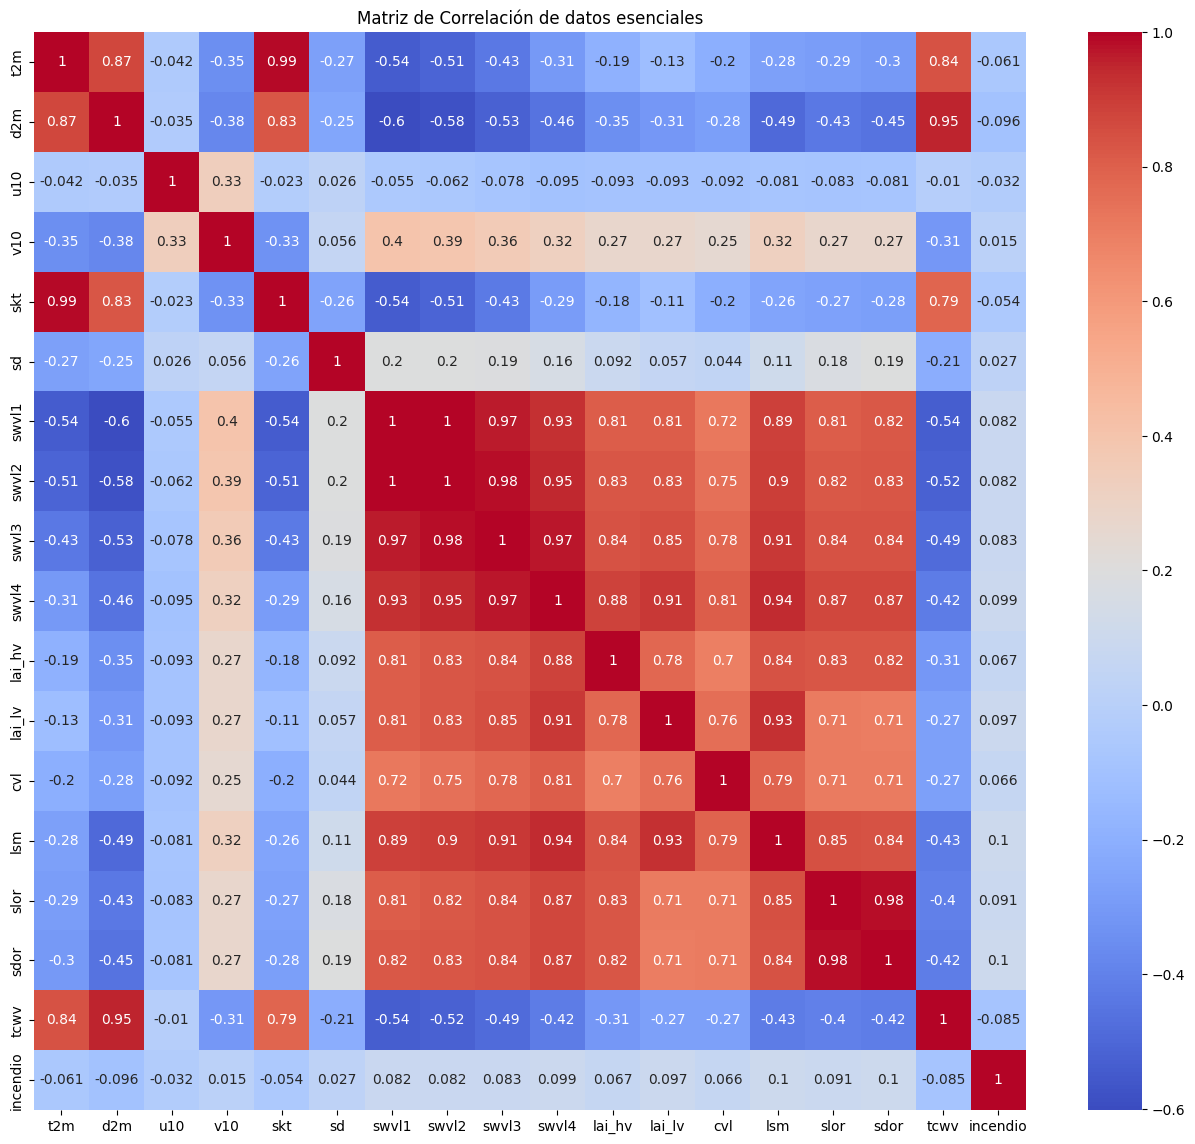

In [11]:
import pandas as pd
import seaborn as sns

da_t2m = dataset_3['t2m'].values.flatten()
da_d2m = dataset_3['d2m'].values.flatten()
da_u10 = dataset_3['u10'].values.flatten()
da_v10 = dataset_3['v10'].values.flatten()
da_skt = dataset_3['skt'].values.flatten()
da_sd = dataset_3['sd'].values.flatten()
da_swvl1 = dataset_3['swvl1'].values.flatten()
da_swvl2 = dataset_3['swvl2'].values.flatten()
da_swvl3 = dataset_3['swvl3'].values.flatten()
da_swvl4 = dataset_3['swvl4'].values.flatten()
da_lai_hv = dataset_3['lai_hv'].values.flatten()
da_lai_lv = dataset_3['lai_lv'].values.flatten()
da_cvl = dataset_3['cvl'].values.flatten()
da_lsm = dataset_3['lsm'].values.flatten()
da_slor = dataset_3['slor'].values.flatten()
da_sdor = dataset_3['sdor'].values.flatten()
da_tcwv = dataset_3['tcwv'].values.flatten()
da_incendio = dataset_3['incendio'].values.flatten()

inc_num = dataset_3["incendio"].astype("int8")

df = pd.DataFrame({
    't2m': da_t2m,
    'd2m': da_d2m,
    'u10': da_u10,
    'v10': da_v10,
    'skt': da_skt,
    'sd': da_sd,
    'swvl1': da_swvl1,
    'swvl2': da_swvl2,
    'swvl3': da_swvl3,
    'swvl4': da_swvl4,
    'lai_hv': da_lai_hv,
    'lai_lv': da_lai_lv,
    'cvl': da_cvl,
    'lsm': da_lsm,
    'slor': da_slor,
    'sdor': da_sdor,
    'tcwv': da_tcwv,
    'incendio': da_incendio
    # 'rh': rh.values.flatten()
})

df.to_csv('data_pca.csv', index=False)

# Calcular matriz de correlación
correlation_matrix = df.corr()
print("Matriz de Correlación:")
print(correlation_matrix)
plt.figure(figsize=(16, 14)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de datos esenciales')

plt.savefig("matriz_correlacion_test.png", dpi=300, bbox_inches='tight')  # ⬅️ guardar
plt.show()

Se observa que la variable incendio no tiene ninguna correlacion con las variables metereologica, entonces se decide hacer un analisis de componentes principales (PCA)

#### PCA

In [12]:
import xarray as xr
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

vars_meteo = [
    "t2m","d2m","u10","v10","skt","sd","swvl1","swvl2","swvl3",
    "swvl4","lai_hv","lai_lv","cvl","lsm","slor","sdor","tcwv"
]
X = df[vars_meteo].values
y = df["incendio"].astype(int).values  # True/False → 1/0

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)  # puedes ajustar el número
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
pca_df["incendio"] = y


print(pca.explained_variance_ratio_)

[0.5745103  0.17364453 0.07295833 0.05514382 0.03271702]


             PC1       PC2       PC3       PC4       PC5
t2m    -0.173409  0.470621  0.079845  0.070841 -0.002018
d2m    -0.211599  0.394377  0.056921  0.093016  0.131288
u10    -0.018947 -0.106743  0.769050  0.192116 -0.552595
v10     0.132752 -0.141745  0.599431 -0.071037  0.682334
skt    -0.167783  0.461326  0.089950  0.073584 -0.054830
sd      0.069630 -0.151611 -0.132945  0.942923  0.185541
swvl1   0.309955  0.000834  0.007866 -0.009692  0.077381
swvl2   0.311311  0.023389  0.003696 -0.003920  0.070657
swvl3   0.309391  0.071386 -0.004028  0.009346  0.050944
swvl4   0.305112  0.147617 -0.000805  0.013768  0.008973
lai_hv  0.271237  0.191641  0.007792  0.008224 -0.080779
lai_lv  0.265088  0.226300  0.038307 -0.056101  0.091315
cvl     0.249592  0.181206  0.013124 -0.081353  0.048989
lsm     0.296841  0.148350  0.017045 -0.033266 -0.025602
slor    0.281333  0.131473 -0.029087  0.096580 -0.222382
sdor    0.283100  0.120656 -0.034808  0.108066 -0.227270
tcwv   -0.197041  0.391958  0.0

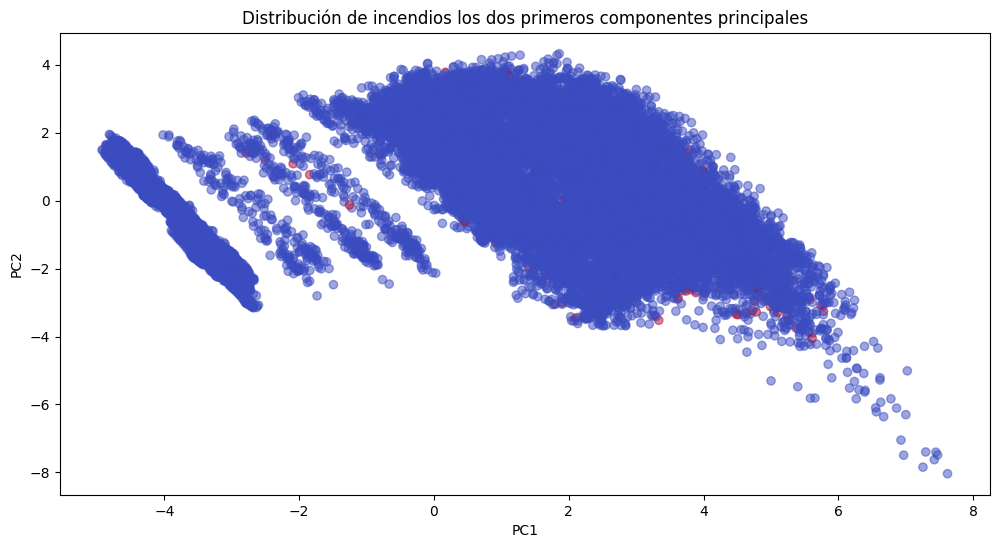

In [18]:
import matplotlib.pyplot as plt

loadings = pd.DataFrame(pca.components_.T, index=vars_meteo, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print(loadings)

plt.figure(figsize=(12,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["incendio"], cmap="coolwarm", alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribución de incendios los dos primeros componentes principales")
plt.show()

No se vislumbra una separacion de sus cluster en el espacio 2D de PCA, se procede a grafica su tercera componente espacio 3D para analizar si es posible ver con claridad los cluster formados

In [19]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar tus datos
data = pd.read_csv('/home/kynz/Documents/cambio-climatico-hackaton/Manuel/data_pca.csv')

# Seleccionar las características para PCA (excluyendo 'incendio' de las features)
features = data[["t2m","d2m","u10","v10","skt","sd","swvl1","swvl2","swvl3","swvl4",
                "lai_hv","lai_lv","cvl","lsm","slor","sdor","tcwv"]]

# Escalar los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=3)
components = pca.fit_transform(x_scaled)

# Calcular varianza total explicada
total_var = pca.explained_variance_ratio_.sum() * 100

# Crear DataFrame para los componentes
components_df = pd.DataFrame(components, columns=['PC1', 'PC2', 'PC3'])

# Usar la columna 'incendio' para colorear
fig = px.scatter_3d(
    components_df, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    color=data['incendio'],  # Colorear por si hay incendio o no
    title=f'Varianza total explicada: {total_var:.2f}%',
    labels={'PC1': 'PC 1', 'PC2': 'PC 2', 'PC3': 'PC 3'},
    color_continuous_scale='viridis',  # Puedes cambiar el esquema de colores
    size_max=5,  # TAMAÑO MÁXIMO MÁS PEQUEÑO (por defecto es 20)
    opacity=0.7
)

fig.show()

En vista que aun en el espacio 3D de PCA, no se puede ver una buena separacion de los cluster para llegar a una conclusion, se procede a hacer los siguientes graficos:

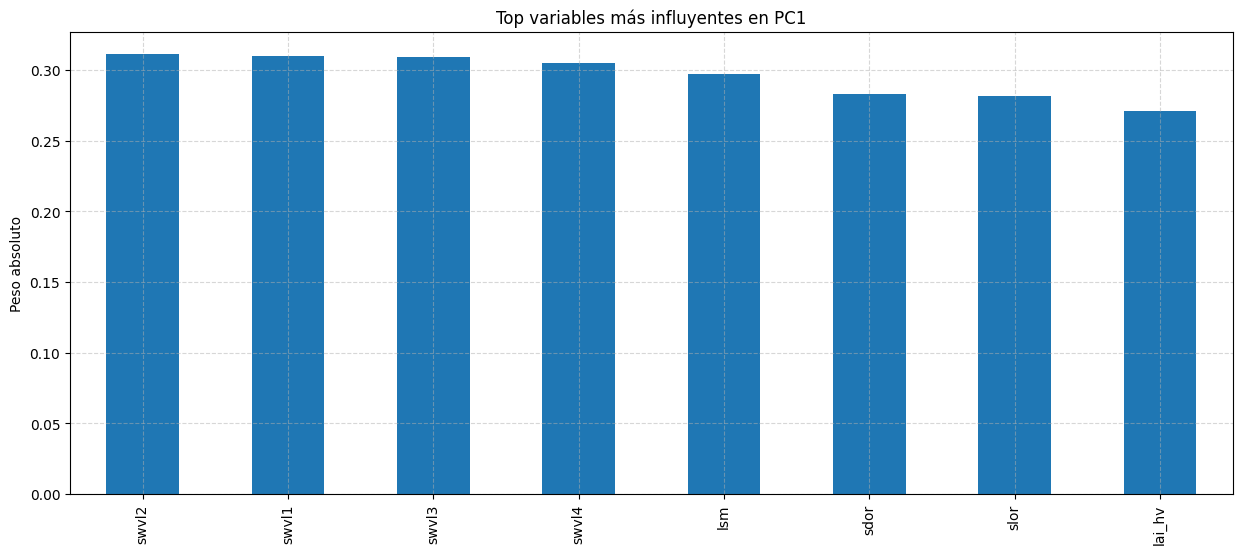

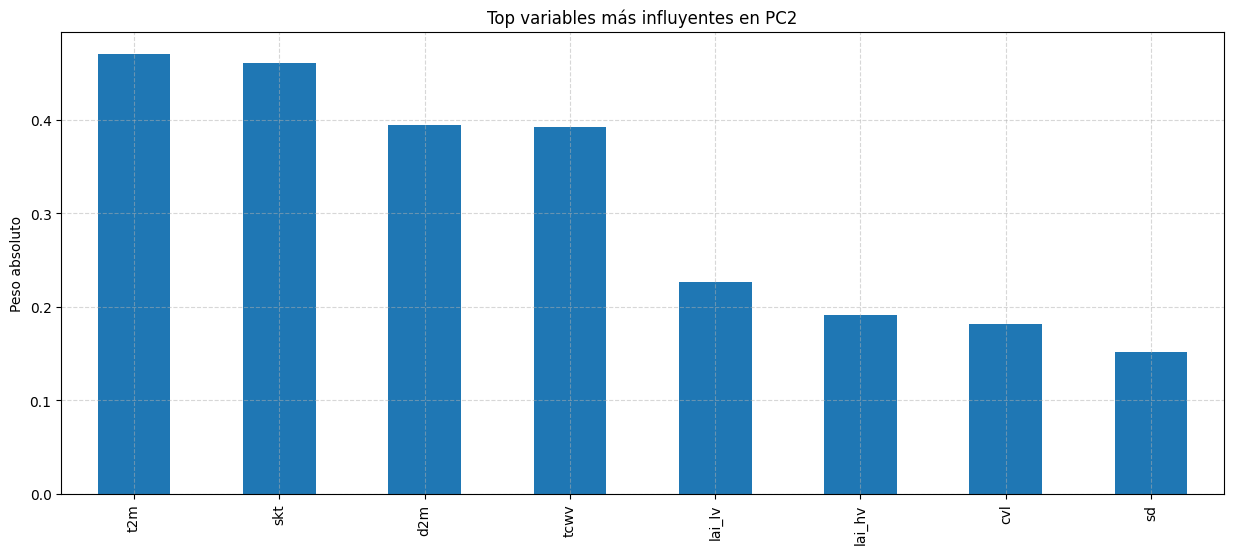

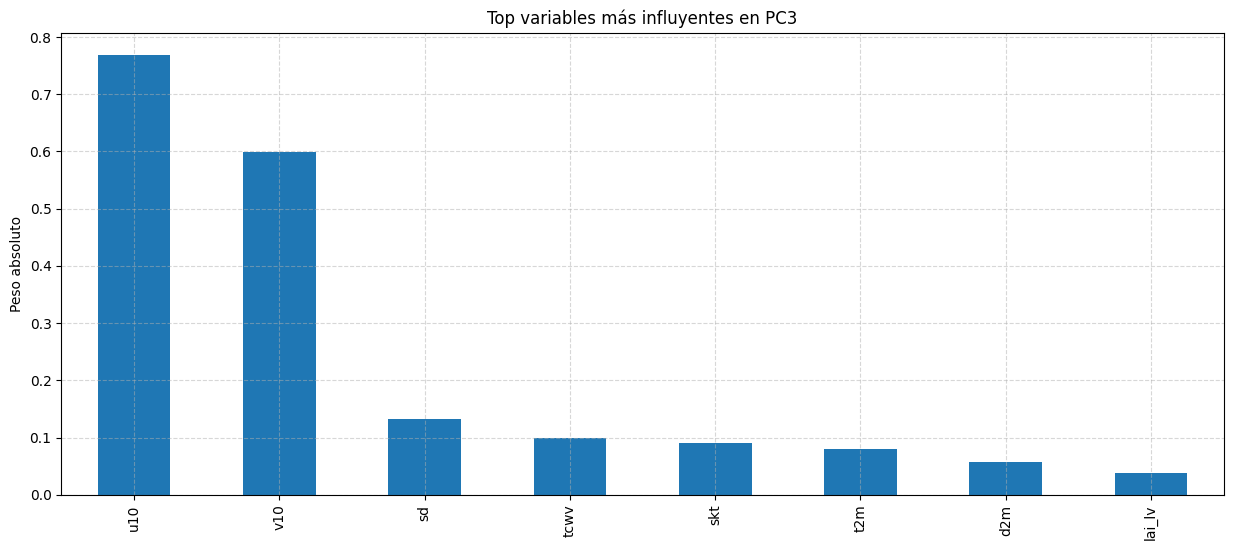

In [23]:
for pc in ["PC1", "PC2", "PC3"]:
    plt.figure(figsize=(15,6))
    loadings[pc].abs().sort_values(ascending=False).head(8).plot(kind="bar")
    plt.title(f"Top variables más influyentes en {pc}")
    plt.ylabel("Peso absoluto")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

Donde se puede concluir que las variables que estan mas relacionada conque haya un incendio y asi proponer un modelo